# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

<img src="https://i.imgur.com/49FNOHj.jpg">

# Import Statements

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

In [2]:
lego_data = pd.read_csv("./data/colors.csv")

In [10]:
lego_data.tail()

,id,name,rgb,is_trans
130,1004,Trans Flame Yellowish Orange,FCB76D,t
131,1005,Trans Fire Yellow,FBE890,t
132,1006,Trans Light Royal Blue,B4D4F7,t
133,1007,Reddish Lilac,8E5597,f
134,9999,[No Color],05131D,f


In [9]:
lego_data['name'].nunique()

135

In [18]:
lego_data.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [19]:
lego_data['is_trans'].value_counts()

f    107
t     28
Name: is_trans, dtype: int64

### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.
<img src="https://i.imgur.com/aKcwkSx.png">

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.
<img src="https://i.imgur.com/whB1olq.png">

In [20]:
lego_sets = pd.read_csv("./data/sets.csv")

In [22]:
lego_sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [23]:
lego_sets.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


In [28]:
sort_year = lego_sets.sort_values('year')
sort_year

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
...,...,...,...,...,...
11289,75290-1,Mos Eisley Cantina,2020,158,0
5147,41430-1,Summer Fun Water Park,2020,494,1012
11337,75550-1,Minions Kung Fu Battle,2021,689,0
11335,75547-1,Minion Pilot in Training,2021,689,0


In [39]:
lego_sets[lego_sets['year'] == 1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [35]:
most_number_sets = lego_sets.sort_values('num_parts', ascending=False)
most_number_sets.head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


In [47]:
sets_by_year = lego_sets.groupby('year').count()
sets_by_year['set_num'].head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

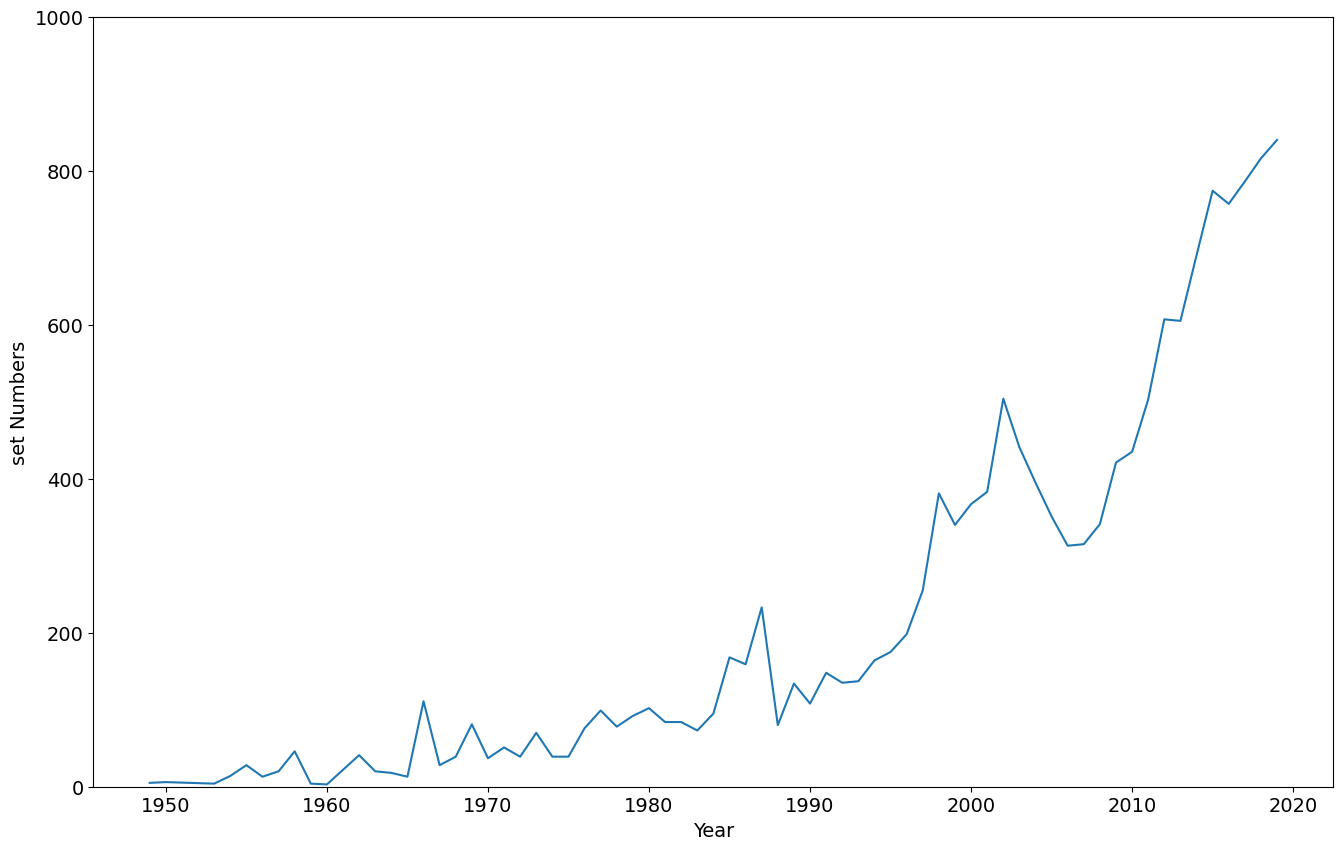

In [75]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('set Numbers', fontsize=14)
plt.ylim(0, 1000)

plt.plot(sets_by_year.index[:-2], sets_by_year['set_num'][:-2])

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [62]:
themes_by_year = lego_sets.groupby('year').agg({'theme_id': pd.Series.nunique})

In [64]:
themes_by_year.rename(columns = {'theme_id': 'nr_themes'}, inplace=True)
themes_by_year.tail()

,nr_themes
year,
2017,89
2018,93
2019,78
2020,82
2021,1


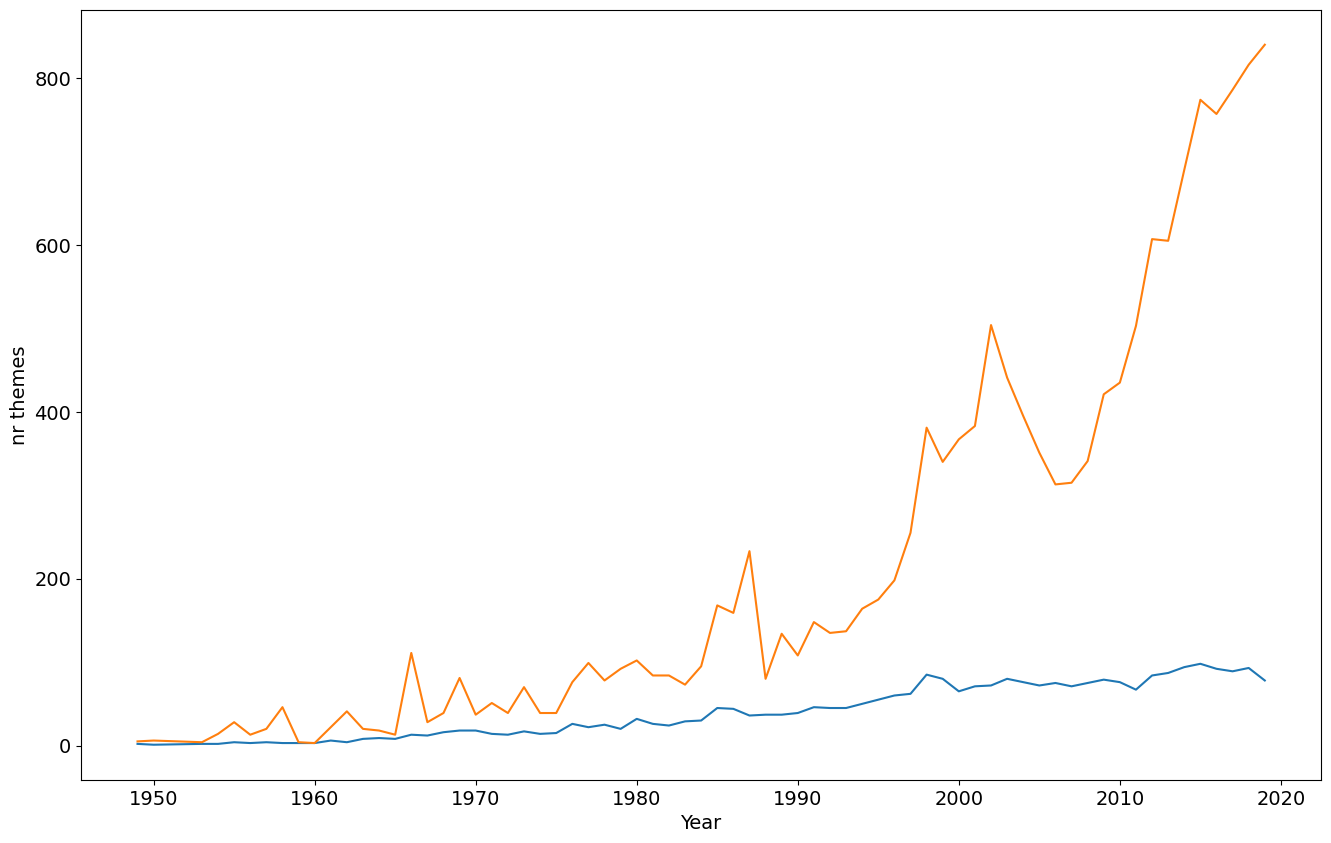

In [77]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('nr themes', fontsize=14)

plt.plot(themes_by_year.index[:-2], themes_by_year['nr_themes'][:-2])
plt.plot(sets_by_year.index[:-2], sets_by_year['set_num'][:-2])

Text(0, 0.5, 'Number of Themes')

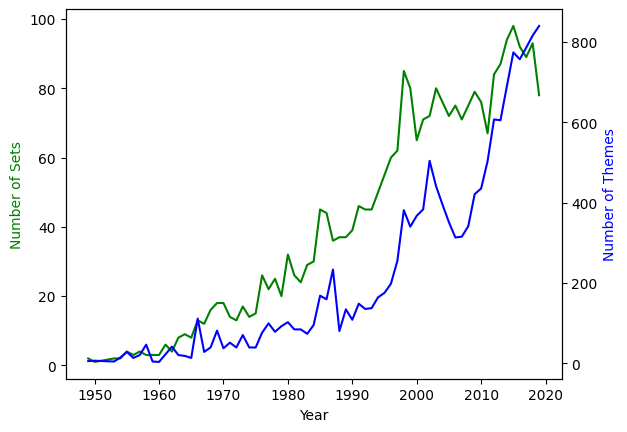

In [80]:
ax1 = plt.gca() # get current axis
ax2 = ax1.twinx() # create another axis that shares the same x-axis

ax1.plot(themes_by_year.index[:-2], themes_by_year['nr_themes'][:-2], color='g')
ax2.plot(sets_by_year.index[:-2], sets_by_year['set_num'][:-2], color='b')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Sets', color='green')
ax2.set_ylabel('Number of Themes', color='blue')

In [88]:
parts_per_set = lego_sets.groupby('year').agg({'num_parts': pd.Series.mean})
parts_per_set.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


In [90]:
parts_per_set.tail()

,num_parts
year,
2017,221.840967
2018,213.618873
2019,207.510714
2020,259.732938
2021,0.000000


### Scatter Plots in Matplotlib

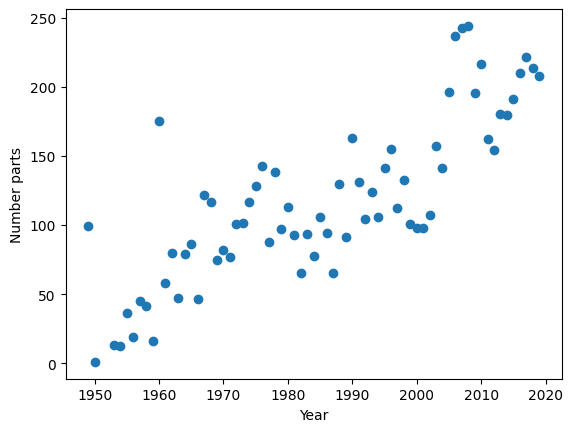

In [95]:
plt.xlabel('Year')
plt.ylabel('Number parts')
plt.scatter(parts_per_set.index[:-2], parts_per_set['num_parts'][:-2])

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [99]:
set_theme_count = lego_sets['theme_id'].value_counts()
set_theme_count[:-5].head()

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64

<img src="https://i.imgur.com/Sg4lcjx.png">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

In [100]:
themes = pd.read_csv('./data/themes.csv')

In [114]:
themes[themes['name'] == 'Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [115]:
set_theme_count[set_theme_count.index == 18]

18    11
Name: theme_id, dtype: int64

In [116]:
set_theme_count[set_theme_count.index == 209]

209    10
Name: theme_id, dtype: int64

In [117]:
set_theme_count[set_theme_count.index == 261]

261    2
Name: theme_id, dtype: int64

### Merging (i.e., Combining) DataFrames based on a Key


In [118]:
set_theme_count = pd.DataFrame({'id':set_theme_count.index,
                                'set_count':set_theme_count.values})
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [122]:
merge_df = pd.merge(set_theme_count, themes, on='id')
merge_df.head()

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


<BarContainer object of 10 artists>

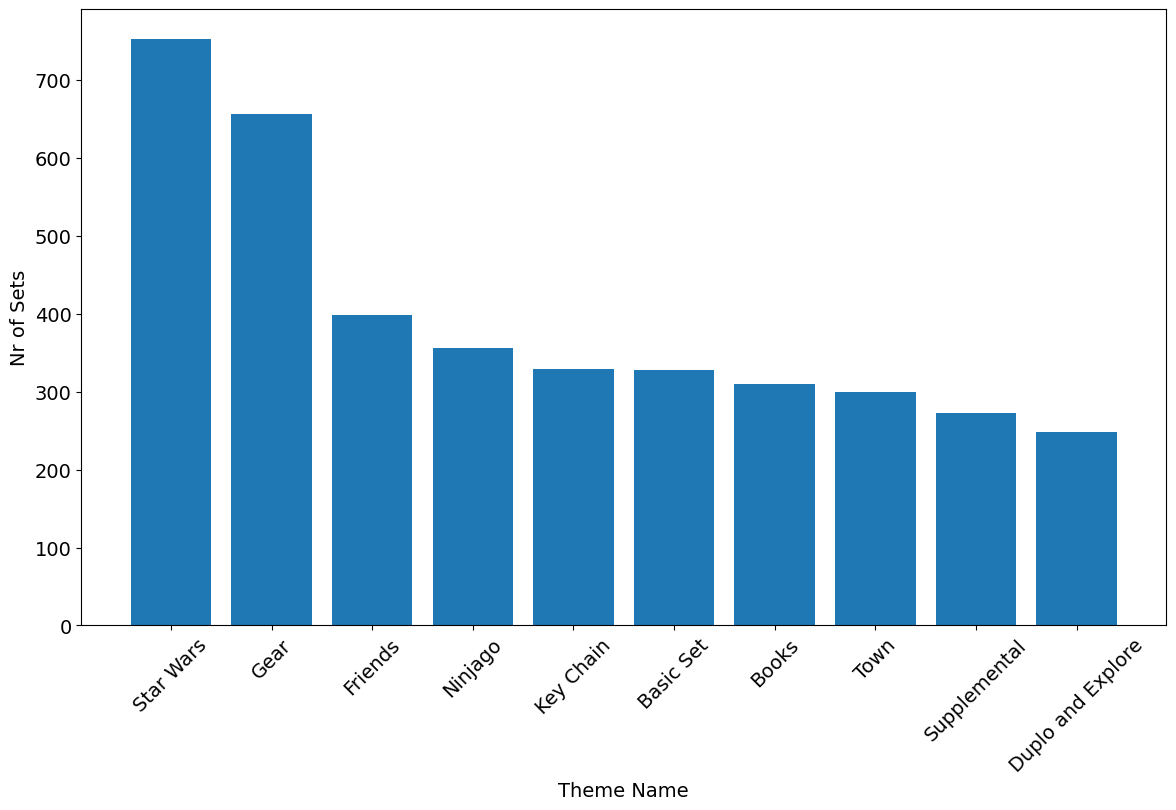

In [124]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)

plt.bar(merge_df.name[:10], merge_df.set_count[:10])